In [46]:
## import needed libraries
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import seaborn as sns
from scipy.stats import pearsonr,shapiro,levene,ttest_ind, mannwhitneyu

In [16]:
## load data
control_df = pd.read_csv(r'data/control_group.csv', sep=';')
test_df = pd.read_csv(r'data/test_group.csv', sep=';')

In [28]:
## check type
control_df.dtypes

Campaign Name           object
Date                    object
Spend [USD]              int64
# of Impressions       float64
Reach                  float64
# of Website Clicks    float64
# of Searches          float64
# of View Content      float64
# of Add to Cart       float64
# of Purchase          float64
dtype: object

In [29]:
## check type
test_df.dtypes

Campaign Name          object
Date                   object
Spend [USD]             int64
# of Impressions        int64
Reach                   int64
# of Website Clicks     int64
# of Searches           int64
# of View Content       int64
# of Add to Cart        int64
# of Purchase           int64
dtype: object

In [17]:
## check
control_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
## check missing value
control_df.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

In [32]:
## remove missing value
control_df.dropna(inplace=True)

In [33]:
## check missing value
test_df.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [34]:
control_df.shape

(29, 10)

In [35]:
## check
test_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [36]:
test_df.shape

(30, 10)

In [37]:
## check descriptive
control_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Spend [USD],29.0,2304.068966,363.534822,1757.0,1962.0,2319.0,2544.0,3083.0
# of Impressions,29.0,109559.758621,21688.922908,71274.0,92029.0,113430.0,121332.0,145248.0
Reach,29.0,88844.931034,21832.349595,42859.0,74192.0,91579.0,102479.0,127852.0
# of Website Clicks,29.0,5320.793103,1757.369003,2277.0,4085.0,5224.0,6628.0,8137.0
# of Searches,29.0,2221.310345,866.089368,1001.0,1615.0,2390.0,2711.0,4891.0
# of View Content,29.0,1943.793103,777.545469,848.0,1249.0,1984.0,2421.0,4219.0
# of Add to Cart,29.0,1300.000000,407.457973,442.0,930.0,1339.0,1641.0,1913.0
# of Purchase,29.0,522.793103,185.028642,222.0,372.0,501.0,670.0,800.0


In [38]:
## check descriptive
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Spend [USD],30.0,2563.066667,348.687681,1968.0,2324.50,2584.0,2836.25,3112.0
# of Impressions,30.0,74584.800000,32121.377422,22521.0,47541.25,68853.5,99500.00,133771.0
Reach,30.0,53491.566667,28795.775752,10598.0,31516.25,44219.5,78778.75,109834.0
# of Website Clicks,30.0,6032.333333,1708.567263,3038.0,4407.00,6242.5,7604.75,8264.0
# of Searches,30.0,2418.966667,388.742312,1854.0,2043.00,2395.5,2801.25,2978.0
# of View Content,30.0,1858.000000,597.654669,858.0,1320.00,1881.0,2412.00,2801.0
# of Add to Cart,30.0,881.533333,347.584248,278.0,582.50,974.0,1148.50,1391.0
# of Purchase,30.0,521.233333,211.047745,238.0,298.00,500.0,701.00,890.0


In [39]:
## put comparison of descriptive statistics of two groups
desc_compare_df = pd.DataFrame ({"Control_Impression": control_df["# of Impressions"].describe (),"Test_Impression": test_df["# of Impressions"].describe (),
                                 "Control_Click": control_df["# of Website Clicks"].describe (),"Test_Click": test_df["# of Website Clicks"].describe (),
                                 "Control_Add_to_Cart": control_df["# of Add to Cart"].describe (),"Test_Add_to_Cart": test_df["# of Add to Cart"].describe (),
                                 "Control_Purchase": control_df["# of Purchase"].describe (),"Test_Purchase": test_df["# of Purchase"].describe ()})

In [40]:
desc_compare_df.head() 

,Control_Impression,Test_Impression,Control_Click,Test_Click,Control_Add_to_Cart,Test_Add_to_Cart,Control_Purchase,Test_Purchase
count,29.000000,30.000000,29.000000,30.000000,29.000000,30.000000,29.000000,30.000000
mean,109559.758621,74584.800000,5320.793103,6032.333333,1300.000000,881.533333,522.793103,521.233333
std,21688.922908,32121.377422,1757.369003,1708.567263,407.457973,347.584248,185.028642,211.047745
min,71274.000000,22521.000000,2277.000000,3038.000000,442.000000,278.000000,222.000000,238.000000
25%,92029.000000,47541.250000,4085.000000,4407.000000,930.000000,582.500000,372.000000,298.000000


<h3>Assumption Check</h3>

C:\Users\muarrikh.yazka\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\muarrikh.yazka\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\muarrikh.yazka\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

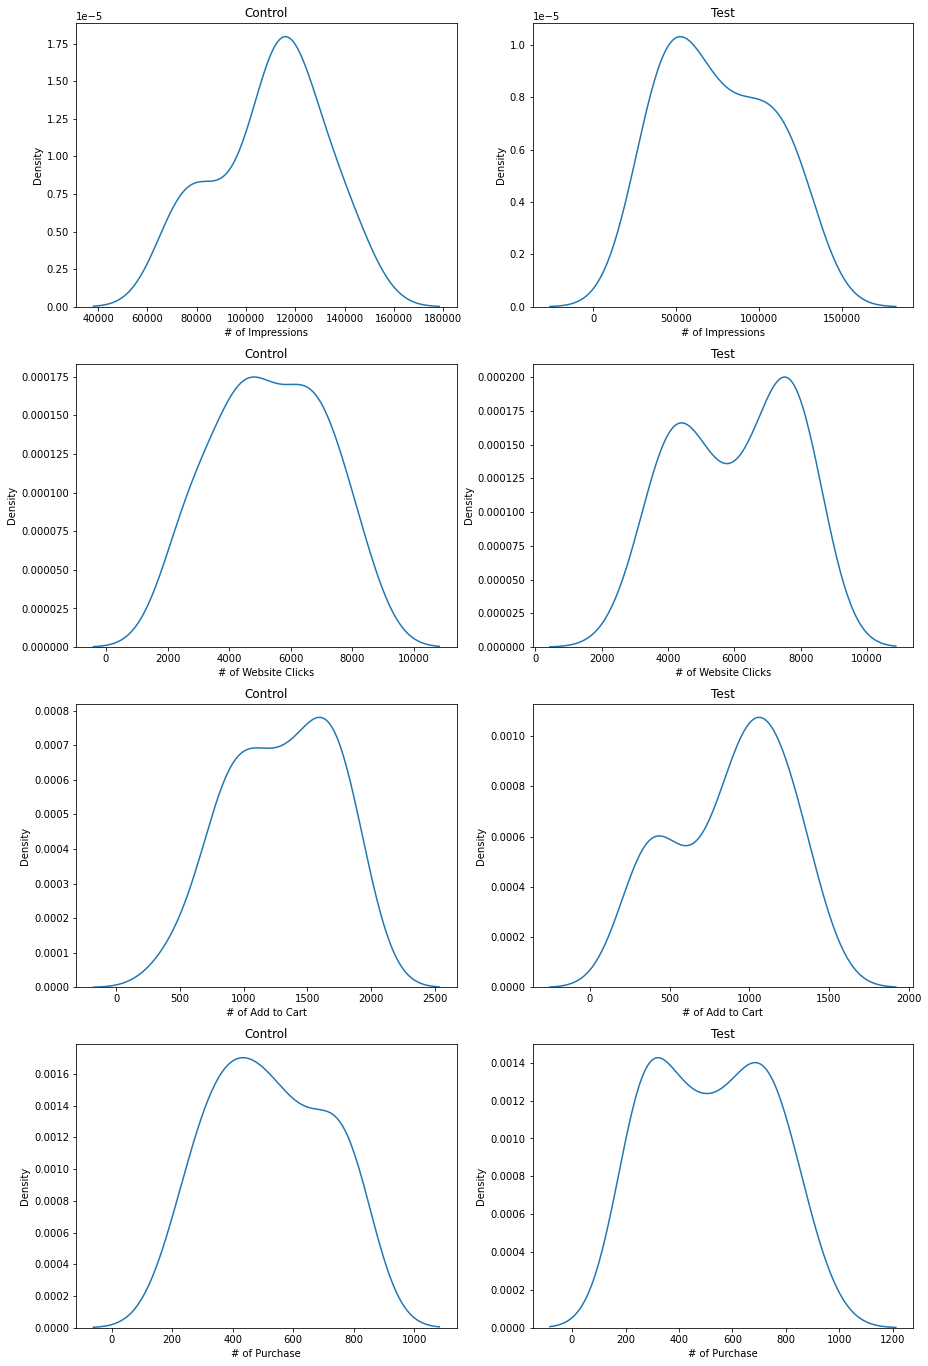

In [66]:
## check normality by chart
cols = ['# of Impressions','# of Website Clicks','# of Add to Cart','# of Purchase']
row = 0
fig, ax = plt.subplots(4,2)
fig.set_figheight(24)
fig.set_figwidth(15)
for col in cols:
    sns.distplot (control_df[col], hist=False,ax=ax[row][0])
    sns.distplot (test_df[col], hist=False,ax=ax[row][1])
    ax[row][0].set_title('Control')
    ax[row][1].set_title('Test')
    row+=1
plt.show()

In [43]:
print('Control Group \n')
for col in cols:
    test_stat, pvalue = shapiro(control_df[col])
    print(col)
    print('Test Stat = %.4f, p-value = %.4f \n' % (test_stat, pvalue))

Control Group 

# of Impressions
Test Stat = 0.9426, p-value = 0.1172 

# of Website Clicks
Test Stat = 0.9586, p-value = 0.3043 

# of Add to Cart
Test Stat = 0.9554, p-value = 0.2525 

# of Purchase
Test Stat = 0.9381, p-value = 0.0896 



In [ ]:
## All p-values are higher than 0.05 it means H0 cannot be rejected. The assumption of normality is provided.

In [44]:
print('Test Group \n')
for col in cols:
    test_stat, pvalue = shapiro(test_df[col])
    print(col)
    print('Test Stat = %.4f, p-value = %.4f \n' % (test_stat, pvalue) )

Test Group 

# of Impressions
Test Stat = 0.9485, p-value = 0.1537 

# of Website Clicks
Test Stat = 0.9062, p-value = 0.0120 

# of Add to Cart
Test Stat = 0.9236, p-value = 0.0332 

# of Purchase
Test Stat = 0.9182, p-value = 0.0241 



In [ ]:
## # of Impressions is normal, but the rest is not

In [47]:
for col in cols:
    ttest_lev, p_value_lev = levene (control_df[col], test_df[col])
    print(col)
    print ("ttest statistics: {}\np_value: {}\n".format (ttest_lev, p_value_lev))

# of Impressions
ttest statistics: 6.8867144172541295
p_value: 0.011125294220972793

# of Website Clicks
ttest statistics: 0.041895271352688654
p_value: 0.8385486753201417

# of Add to Cart
ttest statistics: 1.4290971599392581
p_value: 0.2368617582504474

# of Purchase
ttest statistics: 1.230260648051359
p_value: 0.2720142278811527



In [ ]:
# All of the p values except those for the # of Impressions are higher than 0.05, 
# it means we cannot reject the H0 hypothesis. 
# Therefore, we can say that there is NO statistically significant difference between the variance distributions of the # of Website Clicks,# of Add to Cart and # of Purchase values of the 2 groups.
# There is statistically significant difference between the variance distributions of the # of Impressions values of the 2 groups.

<h3>Parametric Comparison (Independent Two-Sample T-Test)</h3>

In [ ]:
# H0: µ1 = µ2 (the two population means are equal)
# H1: µ1 ≠ µ2 (the two population means are not equal)

In [49]:
ttest_ind_Click, p_value_ind_Click = ttest_ind (control_df["# of Website Clicks"], test_df["# of Website Clicks"], equal_var=True)
print ("ttest statistics: {}\np_value: {}".format (ttest_ind_Click, p_value_ind_Click))

ttest statistics: -1.576909404840952
p_value: 0.12035072366063822


In [50]:
ttest_ind_Add_to_Cart, p_value_ind_Add_to_Cart = ttest_ind (control_df["# of Add to Cart"], test_df["# of Add to Cart"], equal_var=True)
print ("ttest statistics: {}\np_value: {}".format (ttest_ind_Add_to_Cart, p_value_ind_Add_to_Cart))

ttest statistics: 4.24906420944249
p_value: 8.032960071149041e-05


In [51]:
ttest_ind_Purch, p_value_ind_Purch = ttest_ind (control_df["# of Purchase"], test_df["# of Purchase"], equal_var=True)
print ("ttest statistics: {}\np_value: {}".format (ttest_ind_Purch, p_value_ind_Purch))

ttest statistics: 0.03014479856562245
p_value: 0.9760568756579724


<h3>Nonparametric Comparison (Mann-Whitney U Test)</h3>

In [52]:
ttest_value_Imp, p_value_Imp = mannwhitneyu (control_df["# of Impressions"], test_df["# of Impressions"])
print ("ttest statistics: {}\np_value: {}".format (ttest_value_Imp, p_value_Imp))

ttest statistics: 697.0
p_value: 7.344126278759323e-05


<h3>Conclusion</h3>

In [53]:
test_df["# of Impressions"].mean(),control_df["# of Impressions"].mean()

(74584.8, 109559.75862068965)

In [54]:
test_df["# of Website Clicks"].mean(),control_df["# of Website Clicks"].mean()

(6032.333333333333, 5320.793103448276)

In [55]:
test_df["# of Add to Cart"].mean(),control_df["# of Add to Cart"].mean()

(881.5333333333333, 1300.0)

In [56]:
test_df["# of Purchase"].mean(),control_df["# of Purchase"].mean()

(521.2333333333333, 522.7931034482758)